# US visa application analysis

## Section 1 -- Data cleaning

In [1]:
# read the csv file using pandas
# read the csv file using pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
%matplotlib inline

data = pd.read_csv("/Users/marjan/Desktop/us_perm_visas.csv")
data

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000,NaN,yr,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PERM,A-07352-06288,NaN,NaN,Denied,EWI,...,NaN,NaN,NaN,Other Economic Sector,37024,NaN,yr,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,PERM,A-07354-06926,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,Educational Services,47084,52000,yr,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,PERM,A-08004-10147,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Advanced Mfg,36733,NaN,yr,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,PERM,A-08004-10184,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,IT,44824,85000,yr,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,PERM,A-08010-11785,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Retail,12.86,16.82,hr,NaN,NaN,NaN


In [2]:
# original data size
# rows: 374362
# columns: 154
data.shape

(374362, 154)

In [3]:
print "Total number of countries applying for visa applicants is %d" %data['country_of_citizenship'].dropna().value_counts().shape[0] # we have 202 countries with various number of applicants.
data['country_of_citizenship'].dropna().value_counts()

Total number of countries applying for visa applicants is 202


INDIA                       194611
CHINA                        27755
SOUTH KOREA                  23614
CANADA                       13776
MEXICO                        8284
PHILIPPINES                   7883
UNITED KINGDOM                4650
TAIWAN                        3901
PAKISTAN                      3680
FRANCE                        3000
NEPAL                         2887
BRAZIL                        2744
JAPAN                         2735
VENEZUELA                     2569
RUSSIA                        2401
TURKEY                        2328
IRAN                          2283
VIETNAM                       2249
GERMANY                       2202
ITALY                         1847
ISRAEL                        1801
COLOMBIA                      1692
AUSTRALIA                     1612
UKRAINE                       1454
SPAIN                         1365
POLAND                        1317
ARGENTINA                     1112
NIGERIA                       1067
BANGLADESH          

# 1.2. Data cleaning for ratio of acceptance in different countries:
Since in some countries, there is a small number of visa applicants, it does not give us an informative data,so we need to set a threshold and disregard cases with small amount of applicants, while cleaning the data.

In [4]:
#First clean the data based on column of 'country_of_citizenship'.
#We set the threshold to countries with 3000 applicants or more.
#There are 10 countries we'll work in clean_data

data_clean=data[['country_of_citizenship','case_status']] #here we just needs columns containing country of citizenship and their status.
data_clean=data_clean.dropna(subset=['country_of_citizenship','case_status']) #clean data from Nan vaiables.
data_clean['country_of_citizenship'].tolist()


top_countries=data_clean.country_of_citizenship.value_counts()

list_top_countries=top_countries.index.values.tolist()[:10] #choose top 10 countries

data_clean['country_of_citizenship']=data_clean['country_of_citizenship'].where(data_clean['country_of_citizenship'].isin(list_top_countries))
data_clean=data_clean.dropna(subset=['country_of_citizenship'])
data_clean

,country_of_citizenship,case_status
20578,INDIA,Certified
20579,PHILIPPINES,Certified
20580,INDIA,Certified-Expired
20581,INDIA,Certified
20582,INDIA,Certified
20583,INDIA,Certified-Expired
20585,INDIA,Certified-Expired
20586,SOUTH KOREA,Certified-Expired
20587,INDIA,Certified-Expired
20588,PHILIPPINES,Certified-Expired


# 2. Find Acceptance ratio:

Here we include Certified and Certifies_expired in one category and disregard withdrawn case status.

In [6]:

data_clean = data_clean[data_clean["case_status"] != "Withdrawn"] #removing withdrawn in case status
data_clean.loc[data_clean.case_status == 'Certified-Expired', 'case_status'] = 'Certified' #adding Certified expired to certified case status.
data_clean #will be used for countries of citizenship


,country_of_citizenship,case_status
20578,INDIA,Certified
20579,PHILIPPINES,Certified
20580,INDIA,Certified
20581,INDIA,Certified
20582,INDIA,Certified
20583,INDIA,Certified
20585,INDIA,Certified
20586,SOUTH KOREA,Certified
20587,INDIA,Certified
20588,PHILIPPINES,Certified


In [9]:
data = data[data["case_status"] != "Withdrawn"] #removing withdrawn in case status
data.loc[data.case_status == 'Certified-Expired', 'case_status'] = 'Certified' #adding Certified expired to certified case status.
data #will be used for employer states and cities

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000,NaN,yr,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PERM,A-07352-06288,NaN,NaN,Denied,EWI,...,NaN,NaN,NaN,Other Economic Sector,37024,NaN,yr,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,PERM,A-07354-06926,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Educational Services,47084,52000,yr,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,PERM,A-08004-10147,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Advanced Mfg,36733,NaN,yr,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,PERM,A-08004-10184,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,IT,44824,85000,yr,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,PERM,A-08010-11785,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Retail,12.86,16.82,hr,NaN,NaN,NaN


# 2.1. Find Ratio of accepted and denied visas for top 10 countries.

In [10]:
total_ratio=[] #Each time, in the following for loop, we consider one country among top 10 countries
#and find if they had been accepted or denied, then devide the value by total number of applicants in that specific
#country. This way we find the acceptance and denied ratio for each country.
for i in range(len((data_clean.country_of_citizenship.value_counts()))):
    data_ratio=np.array([data_clean.country_of_citizenship.value_counts().index[i],(data_clean[np.logical_and(data_clean['country_of_citizenship']==data_clean.country_of_citizenship.value_counts().index[i],data_clean['case_status']=='Certified')].shape[0]/float(data_clean.country_of_citizenship.value_counts()[i]))*100,(data_clean[np.logical_and(data_clean['country_of_citizenship']==data_clean.country_of_citizenship.value_counts().index[i],data_clean['case_status']=='Denied')].shape[0]/float(data_clean.country_of_citizenship.value_counts()[i]))*100])
    total_ratio.append(data_ratio)
    
total_ratio = np.array(total_ratio)
total_ratio

array([['INDIA', '95.4244901674', '4.57550983258'],
       ['CHINA', '94.3712620183', '5.62873798168'],
       ['SOUTH KOREA', '88.7736827222', '11.2263172778'],
       ['CANADA', '93.8685353035', '6.13146469647'],
       ['MEXICO', '77.5546292788', '22.4453707212'],
       ['PHILIPPINES', '81.8169672679', '18.1830327321'],
       ['UNITED KINGDOM', '91.8441323063', '8.1558676937'],
       ['TAIWAN', '93.9024390244', '6.09756097561'],
       ['PAKISTAN', '91.2175648703', '8.78243512974'],
       ['FRANCE', '94.566353187', '5.43364681296']], dtype='|S14')

# 2.2. Find Ratio of accepted and denied visas for top 10 states.

In [11]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}
us_state_abbrev = {v: k for k, v in us_state_abbrev.items()}
data['employer_state'].replace(us_state_abbrev, inplace=True)
data["employer_state"] = data["employer_state"].str.upper()

In [12]:
total_ratio_state=[] #Each time, in the following for loop, we consider one state among top 10 states
#and find if they had been accepted or denied, then devide the value by total number of applicants in that specific
#state. This way we find the acceptance and denied ratio for each top 10 employer state.
for i in range(len((data.employer_state.value_counts()[:10]))):
    data_ratio_state=np.array([data.employer_state.value_counts().index[i],(data[np.logical_and(data['employer_state']==data.employer_state.value_counts().index[i],data['case_status']=='Certified')].shape[0]/float(data.employer_state.value_counts()[i]))*100,(data[np.logical_and(data['employer_state']==data.employer_state.value_counts().index[i],data['case_status']=='Denied')].shape[0]/float(data.employer_state.value_counts()[i]))*100])
    total_ratio_state.append(data_ratio_state)
    
total_ratio_state = np.array(total_ratio_state)
total_ratio_state

array([['CALIFORNIA', '94.2217986096', '5.77820139045'],
       ['TEXAS', '93.0101309155', '6.98986908452'],
       ['NEW JERSEY', '92.2026677841', '7.79733221594'],
       ['NEW YORK', '91.968979531', '8.03102046904'],
       ['WASHINGTON', '97.9548488894', '2.04515111057'],
       ['ILLINOIS', '92.4816427318', '7.51835726818'],
       ['MASSACHUSETTS', '95.8425370779', '4.15746292206'],
       ['MICHIGAN', '93.6429254718', '6.35707452822'],
       ['PENNSYLVANIA', '94.3364845938', '5.66351540616'],
       ['VIRGINIA', '90.6457026764', '9.35429732356']], dtype='|S13')

# 2.3. Find Ratio of accepted and denied visas for top 10 states.

In [13]:
total_ratio_city=[] #Each time, in the following for loop, we consider one city among top 10 cities
#and find if they had been accepted or denied, then devide the value by total number of applicants in that specific
#city. This way we find the acceptance and denied ratio for each top 10 employer city.
for i in range(len((data.employer_city.value_counts()[:10]))):
    data_ratio_city=np.array([data.employer_city.value_counts().index[i],(data[np.logical_and(data['employer_city']==data.employer_city.value_counts().index[i],data['case_status']=='Certified')].shape[0]/float(data.employer_city.value_counts()[i]))*100,(data[np.logical_and(data['employer_city']==data.employer_city.value_counts().index[i],data['case_status']=='Denied')].shape[0]/float(data.employer_city.value_counts()[i]))*100])
    total_ratio_city.append(data_ratio_city)
    
total_ratio_city = np.array(total_ratio_city)
total_ratio_city

array([['NEW YORK', '94.6785892946', '5.32141070535'],
       ['COLLEGE STATION', '98.29758825', '1.70241174998'],
       ['SANTA CLARA', '94.0168485545', '5.98315144553'],
       ['SAN JOSE', '96.990226566', '3.00977343403'],
       ['REDMOND', '98.8782618963', '1.12173810367'],
       ['MOUNTAIN VIEW', '98.9904025925', '1.00959740745'],
       ['HOUSTON', '92.0691906005', '7.93080939948'],
       ['SUNNYVALE', '96.4297520661', '3.57024793388'],
       ['SAN FRANCISCO', '96.9080826752', '3.09191732482'],
       ['PLANO', '88.9637588782', '11.0362411218']], dtype='|S15')

# 3.1. Create data frame:
Make a data frame with 3 columns of top 10 counties with accepted and denied visa ratio.
#Sort ratio in descending order.

In [14]:
import pandas as pd
df = pd.DataFrame(total_ratio,columns=['country','accepted_ratio','denied_ratio'])
df['accepted_ratio'] = pd.to_numeric(df['accepted_ratio'], errors = "coerce")
df['denied_ratio'] = pd.to_numeric(df['denied_ratio'], errors = "coerce")
df = df.sort_values(by=["accepted_ratio","denied_ratio"], ascending=False) #With 95.42 percent,India has the most number of acceptance ratio
 #With 22.44 percent,Mexico has the most denied ratio between top 10 countries.
df

,country,accepted_ratio,denied_ratio
0,INDIA,95.424490,4.575510
9,FRANCE,94.566353,5.433647
1,CHINA,94.371262,5.628738
7,TAIWAN,93.902439,6.097561
3,CANADA,93.868535,6.131465
6,UNITED KINGDOM,91.844132,8.155868
8,PAKISTAN,91.217565,8.782435
2,SOUTH KOREA,88.773683,11.226317
5,PHILIPPINES,81.816967,18.183033
4,MEXICO,77.554629,22.445371


# 3.2. Create data frame:
Make a data frame with 3 columns of top 10 states with accepted and denied visa ratio.

In [15]:
import pandas as pd
df_state = pd.DataFrame(total_ratio_state,columns=['state','accepted_ratio','denied_ratio'])
df_state['accepted_ratio'] = pd.to_numeric(df_state['accepted_ratio'], errors = "coerce") #we use this for plotting
df_state['denied_ratio'] = pd.to_numeric(df_state['denied_ratio'], errors = "coerce")
df_state.sort_values(by=["accepted_ratio","denied_ratio"], ascending=False) #sort in descending manner
df_state

,state,accepted_ratio,denied_ratio
0,CALIFORNIA,94.221799,5.778201
1,TEXAS,93.010131,6.989869
2,NEW JERSEY,92.202668,7.797332
3,NEW YORK,91.968980,8.031020
4,WASHINGTON,97.954849,2.045151
5,ILLINOIS,92.481643,7.518357
6,MASSACHUSETTS,95.842537,4.157463
7,MICHIGAN,93.642925,6.357075
8,PENNSYLVANIA,94.336485,5.663515
9,VIRGINIA,90.645703,9.354297


# 3.3. Create data frame:
Make a data frame with 3 columns of top 10 cities with accepted and denied visa ratio.

In [16]:
df_city = pd.DataFrame(total_ratio_city,columns=['city','accepted_ratio','denied_ratio'])
df_city['accepted_ratio'] = pd.to_numeric(df_city['accepted_ratio'], errors = "coerce")
df_city['denied_ratio'] = pd.to_numeric(df_city['denied_ratio'], errors = "coerce")
df_city.sort_values(by=["accepted_ratio"], ascending=False)#sort in descending manner
df_city

,city,accepted_ratio,denied_ratio
0,NEW YORK,94.678589,5.321411
1,COLLEGE STATION,98.297588,1.702412
2,SANTA CLARA,94.016849,5.983151
3,SAN JOSE,96.990227,3.009773
4,REDMOND,98.878262,1.121738
5,MOUNTAIN VIEW,98.990403,1.009597
6,HOUSTON,92.069191,7.930809
7,SUNNYVALE,96.429752,3.570248
8,SAN FRANCISCO,96.908083,3.091917
9,PLANO,88.963759,11.036241


# 4. Visualizing:


# 4.1. Plotting accepted and denied ratio of countries:

(0, 100)

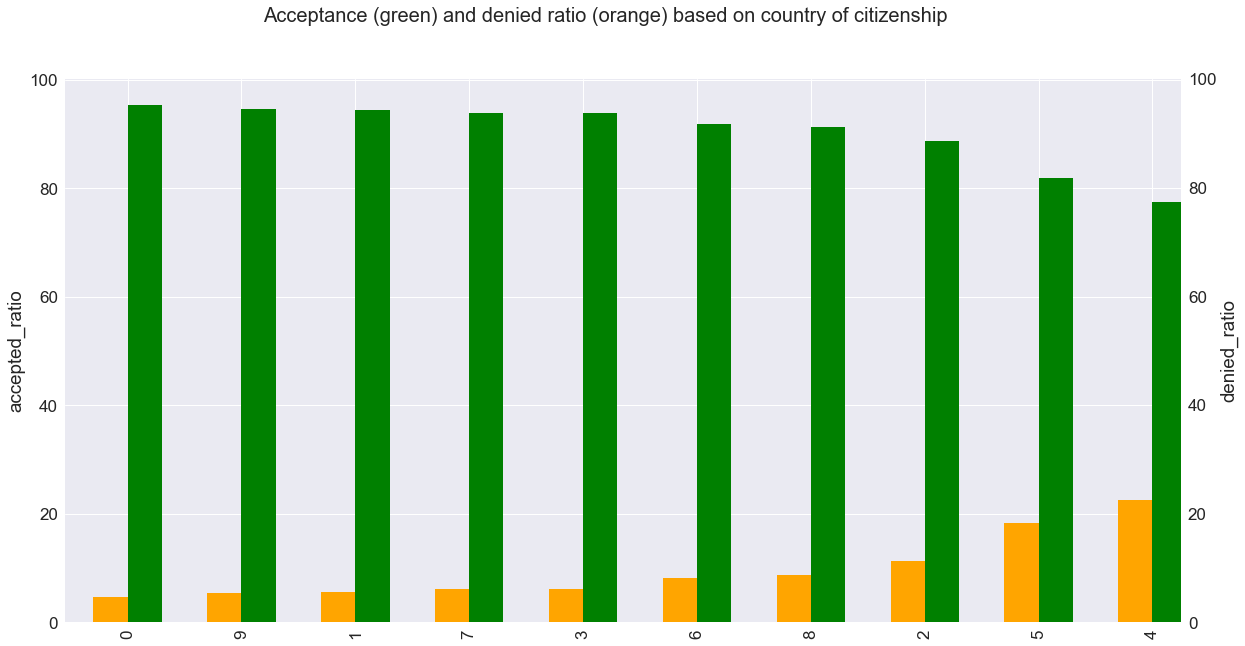

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#df = df.set_index('country')
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure
sns.set(font_scale=1.7)
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df.accepted_ratio.plot(kind='bar',color='green',ax=ax,width=width, position=0,label='accepted ratio')
df.denied_ratio.plot(kind='bar',color='orange', ax=ax2,width = width,position=1,label='denied ratio')
ax.grid(None, axis=1)
ax2.grid(None)

plt.suptitle('Acceptance (green) and denied ratio (orange) based on country of citizenship',size=20)
#plt.legend();
ax.set_ylabel('accepted_ratio')
ax2.set_ylabel('denied_ratio')
plt.ylim([0, 100])


# 4.2. Plotting accepted and denied ratio of states:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_state = df_state.set_index('state')
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure
sns.set(font_scale=1.7)
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_state.accepted_ratio.plot(kind='bar',color='green',ax=ax,width=width, position=0,label='accepted ratio')
df_state.denied_ratio.plot(kind='bar',color='orange', ax=ax2,width = width,position=1,label='denied ratio')
ax.grid(None, axis=1)
ax2.grid(None)

plt.suptitle('Acceptance (green) and denied ratio (orange) based on employer state',size=20)
#plt.legend();
ax.set_ylabel('accepted_ratio')
ax2.set_ylabel('denied_ratio')
plt.ylim([0, 100])

# 4.3. Plotting accepted and denied ratio of cities:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_city = df_city.set_index('city')
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure
sns.set(font_scale=1.7)
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_city.accepted_ratio.plot(kind='bar',color='green',ax=ax,width=width, position=0,label='accepted ratio')
df_city.denied_ratio.plot(kind='bar',color='orange', ax=ax2,width = width,position=1,label='denied ratio')
ax.grid(None, axis=1)
ax2.grid(None)

plt.suptitle('Acceptance (green) and denied ratio (orange) based on employer city',size=20)
#plt.legend();
ax.set_ylabel('accepted_ratio')
ax2.set_ylabel('denied_ratio')
plt.ylim([0, 100])

 # 4.4. Visualizing countries using WordCloud: 

In [ ]:
plt.subplots(figsize=(10,8))
d = path.dirname('/Users/marjan/Desktop/') #we give the direction of the picture which is used as a mask
text = " ".join(data["country_of_citizenship"].dropna().tolist()) #drop nan values of column country of citizenship, and change it to list.
us_mask = np.array(Image.open(path.join(d, "us-map-silhouette-vector.jpg"))) #change the mask to numpy array
wordcloud = WordCloud(background_color="white",mask=us_mask).generate(text) #generate text in mask
plt.imshow(wordcloud, interpolation='bilinear') #show final figure as image
plt.axis("off")
plt.show()

 # 4.5. Visualizing states using WordCloud: 

In [ ]:
plt.subplots(figsize=(10,8))
d = path.dirname('/Users/marjan/Desktop/') #we give the direction of the picture which is used as a mask
text = " ".join(data["employer_state"].dropna().tolist()) #drop nan values of column country of citizenship, and change it to list.
us_mask = np.array(Image.open(path.join(d, "us-map-silhouette-vector.jpg"))) #change the mask to numpy array
wordcloud = WordCloud(background_color="white",mask=us_mask).generate(text) #generate text in mask
plt.imshow(wordcloud, interpolation='bilinear') #show final figure as image
plt.axis("off")
plt.show()

# 4.6. Visualizing cities using WordCloud:  

In [ ]:
plt.subplots(figsize=(10,8))
d = path.dirname('/Users/marjan/Desktop/') #we give the direction of the picture which is used as a mask
text = " ".join(data["employer_city"].dropna().tolist()) #drop nan values of column country of citizenship, and change it to list.
us_mask = np.array(Image.open(path.join(d, "us-map-silhouette-vector.jpg"))) #change the mask to numpy array
wordcloud = WordCloud(background_color="white",mask=us_mask).generate(text) #generate text in mask
plt.imshow(wordcloud, interpolation='bilinear') #show final figure as image
plt.axis("off")
plt.show()

# 4.7  Visualizing jobs using WordCloud

In [ ]:
plt.subplots(figsize=(10,8)) #Here we did the same thing as previous example, but in this part foreign_worker_info_major
#has been visualized.
d = path.dirname('/Users/marjan/Desktop/')
text = " ".join(data["foreign_worker_info_major"].dropna().tolist())
job_mask = np.array(Image.open(path.join(d, "jobs.jpg")))
wordcloud = WordCloud(background_color="white",mask=job_mask).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 5. Analysis for countries based on plot 3.1:


First we had 202 countries with various number of visa applicants. Some countries had large number of visa applicants, like india with 186777 people, while some countries,like Qatar, had only 1 visa applicant. 
We decided to make a threshold and consider countries with 3000 applicants or more, which ended up in having 10 countries with most number of visa applicants.

In plot 4.1, we consider acceptance and denied ratio of top 10 countries mentioned.
As you can see with 95.42 percent,India has the most number of acceptance ratio, while Mexico has the most denied ratio with 22.44 percent between top 10 countries.

In part 4.2, we consider acceptance and denied ratio of top 10 states mentioned.
As you can see with 97.95 percent,Washington has the most number of acceptance ratio, while Virginia has the most denied ratio with 9.35 percent between top 10 states. You can also see these accurate ratioa in part 3.2.

In part 4.3, we consider acceptance and denied ratio of top 10 cities of data.
As you can see with 98.99 percent,Mountain View has the most number of acceptance ratio, while Plano has the most denied ratio with 11.06 percent between top 10 cities.You can also see these accurate ratioa in part 3.3.